In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Downloading the dataset

In [4]:
!wget "https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip"

--2024-01-15 02:16:42--  https://storage.googleapis.com/download.tensorflow.org/data/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.145.207, 209.85.146.207, 142.250.125.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.145.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: 'horse-or-human.zip'

horse-or-human.zip  100%[===================>] 142.65M   217MB/s    in 0.7s    

2024-01-15 02:16:43 (217 MB/s) - 'horse-or-human.zip' saved [149574867/149574867]



In [5]:
import matplotlib.pyplot as plt 
import os
import zipfile


# unzip the folder ,the first waythere are two ways

the first way

In [ ]:
# !unzip -q "/content/horse-or-human.zip"

the second way

In [6]:
loacl_zip = "/kaggle/working/horse-or-human.zip"
zip_ref = zipfile.ZipFile(loacl_zip, 'r')
zip_ref.extractall("/kaggle/working/training")

# Finding the address of sub folders and their files

In [7]:
from os import listdir
from os.path import join
import cv2

In [9]:
images=[]
main_address= '/kaggle/working/training'
main_folders = listdir(main_address)
main_folders

['humans', 'horses']

In [10]:
adress=[]
for folders in main_folders :
  main_folders_address= join (main_address,folders)
  print(main_folders_address)
  adress.append(main_folders_address)
adress


/kaggle/working/training/humans
/kaggle/working/training/horses


['/kaggle/working/training/humans', '/kaggle/working/training/horses']

In [11]:
images=[]
for folders in adress:
  photos = listdir(folders)

  for photo in photos :
    image= join(folders , photo)
    images.append(image)

len(images)

1027

Now we have a list named images which contains addresses of all photos both in the folder of humans and horses

In [12]:
images[:20]

['/kaggle/working/training/humans/human13-05.png',
 '/kaggle/working/training/humans/human06-04.png',
 '/kaggle/working/training/humans/human11-05.png',
 '/kaggle/working/training/humans/human11-09.png',
 '/kaggle/working/training/humans/human17-29.png',
 '/kaggle/working/training/humans/human10-18.png',
 '/kaggle/working/training/humans/human14-18.png',
 '/kaggle/working/training/humans/human10-11.png',
 '/kaggle/working/training/humans/human11-19.png',
 '/kaggle/working/training/humans/human09-27.png',
 '/kaggle/working/training/humans/human09-06.png',
 '/kaggle/working/training/humans/human11-10.png',
 '/kaggle/working/training/humans/human06-29.png',
 '/kaggle/working/training/humans/human09-29.png',
 '/kaggle/working/training/humans/human15-03.png',
 '/kaggle/working/training/humans/human01-08.png',
 '/kaggle/working/training/humans/human13-21.png',
 '/kaggle/working/training/humans/human15-26.png',
 '/kaggle/working/training/humans/human16-05.png',
 '/kaggle/working/training/huma

now ,we want to create a list that contains the images not their adresses

In [13]:
photos=[]
for image in images :
  photo = cv2.cvtColor(cv2.imread(image,cv2.IMREAD_COLOR),cv2.COLOR_BGR2RGB)
  photos.append(photo)


In [14]:
photos[0].shape

(300, 300, 3)

Now we show the photos using matplotlib

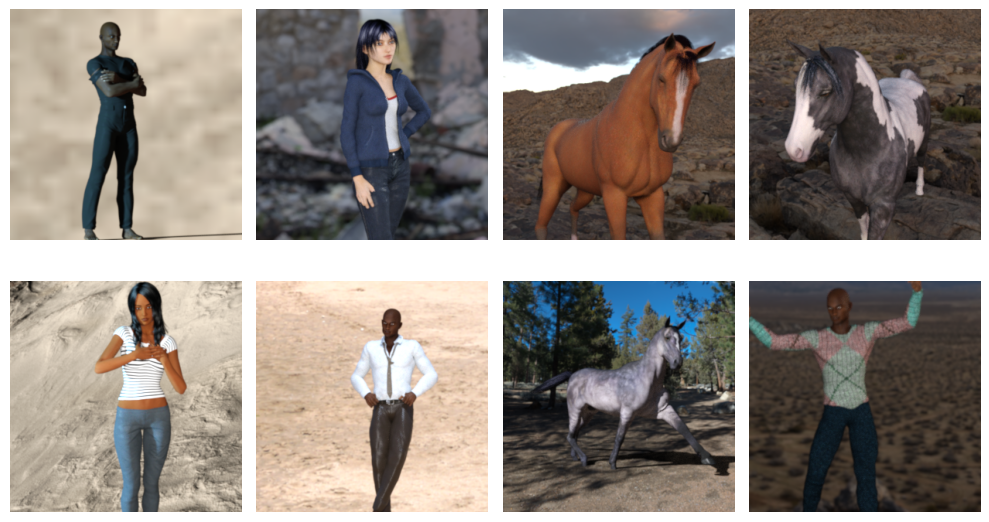

In [15]:
import random
pictures=photos  # because the list of photos remain unchanged

#select 8 random pictures
##method 1
'''random.shuffle(pictures)
samples =pictures[:8]'''
#method 2

samples = random.sample(photos, 8)

# Create a figure with 2 rows and 4 columns of subplots
fig, axs = plt.subplots(2, 4, figsize=(10, 6))  # Adjust figsize as needed
# Iterate through the samples and plot each photo in a subplot
for i, photo in enumerate(samples):
    ax = axs.flat[i]  # Access subplots as a flattened array
    ax.imshow(photo)  # Read and display the image
    ax.axis('off')  # Turn off axes for cleaner display

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


# Splitting data to Train ,Test using train_test_split

In [16]:
cd /kaggle/working/training

/kaggle/working/training


In [17]:
from sklearn.model_selection import train_test_split

# Assuming you have a list of image paths for each class
#human_paths = '/content/training/horses'  # List of paths to human images
#horse_paths = '/content/training/humans'  # List of paths to horse images


#if not os.path.exists('humans'):
#    raise FileNotFoundError('humans directory does not exist')

# Assuming you have a list of image paths for each class
human_paths = [os.path.join('humans', f) for f in os.listdir('humans')]  # Add file extensions
horse_paths = [os.path.join('horses', f) for f in os.listdir('horses')]


# Combine paths and labels
all_paths = human_paths + horse_paths
all_labels = ['human'] * len(human_paths) + ['horse'] * len(horse_paths)


# Split into training and test set (80/20)
train_paths, test_paths, train_labels, test_labels = train_test_split(
    all_paths, all_labels, test_size=0.2, random_state=42  # Set a random seed for reproducibility
)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Creating two different folders namely test and train and transferind data into them

In [18]:
import os
import shutil

# Assuming you have lists of paths for each set,
# denoted as 'train_paths', 'val_paths', and 'test_paths', respectively.

# Create directories for each set
train_dir = os.path.join('data', 'train')
test_dir = os.path.join('data', 'test')

# If these directories already exist, empty them
if os.path.exists(train_dir):
    shutil.rmtree(train_dir)
os.makedirs(train_dir)


if os.path.exists(test_dir):
    shutil.rmtree(test_dir)
os.makedirs(test_dir)

# Move images to their respective directories
for path in train_paths:
    filename = os.path.basename(path)
    shutil.move(path, os.path.join(train_dir, filename))


for path in test_paths:
    filename = os.path.basename(path)
    shutil.move(path, os.path.join(test_dir, filename))

In [19]:
# Count images in train folder
train_size = len(os.listdir('/kaggle/working/training/data/train'))
print(f"Number of images in train folder: {train_size}")


# Count images in test folder
test_size = len(os.listdir('/kaggle/working/training/data/test'))
print(f"Number of images in test folder: {test_size}")

Number of images in train folder: 821
Number of images in test folder: 206


# Creating dataframes containig the adresses and the labels of files for the test and train folders


In [21]:
from pathlib import Path
import pandas as pd
train_path= Path('/kaggle/working/training/data/train')
test_path= Path('/kaggle/working/training/data/test')



def  find_labels (path):
  data=[]
  sub_paths = path.glob(r'**/*.png')
  sub_paths = list(sub_paths)
  for i in range(len(sub_paths)):
      x= os.path.split(sub_paths[i])[1]
      label=x[0:5]
      data.append([str(sub_paths[i]), label])
  df = pd.DataFrame(data, columns=['path', 'label'])
  return  df

train_df= find_labels(train_path)
test_df= find_labels(test_path)

train_df.head(10)

,path,label
0,/kaggle/working/training/data/train/human13-05...,human
1,/kaggle/working/training/data/train/human06-04...,human
2,/kaggle/working/training/data/train/horse47-0.png,horse
3,/kaggle/working/training/data/train/horse08-7.png,horse
4,/kaggle/working/training/data/train/horse38-2.png,horse
5,/kaggle/working/training/data/train/human17-29...,human
6,/kaggle/working/training/data/train/human10-18...,human
7,/kaggle/working/training/data/train/human14-18...,human
8,/kaggle/working/training/data/train/horse13-2.png,horse
9,/kaggle/working/training/data/train/human10-11...,human


# ImageDataGenerator
note :ImageDataGenerator has three different objects


1: flow_from_directory


2:flow_from_dataframe


3:flow


In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_generator = ImageDataGenerator(
    validation_split=0.2,
    rotation_range=45,  # Randomly rotate images by up to 45 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by up to 20%
    height_shift_range=0.2,  # Randomly shift images vertically by up to 20%
    horizontal_flip=True  # Randomly flip images horizontally
)
test_generator = ImageDataGenerator()



In [23]:
train_imgs = train_generator.flow_from_dataframe(
  dataframe = train_df,
  x_col = "path",
  y_col = "label",
  target_size = (224, 224),
  color_mode = "rgb",
  class_mode = "binary",
  batch_size = 32,
  shuffle = True,
  subset = "training"
)
val_imgs = train_generator.flow_from_dataframe(
  dataframe = train_df,
  x_col = "path",
  y_col = "label",
  target_size = (224, 224),
  color_mode = "rgb",
  class_mode = "binary",
  batch_size = 32,
  shuffle = True,
  subset = "validation"
)
test_imgs = test_generator.flow_from_dataframe(
  dataframe = test_df,
  x_col = "path",
  y_col = "label",
  target_size = (224, 224),
  color_mode = "rgb",
  class_mode = "binary",
  batch_size = 32,
  shuffle = False
)

Found 657 validated image filenames belonging to 2 classes.
Found 164 validated image filenames belonging to 2 classes.
Found 206 validated image filenames belonging to 2 classes.


The DataFrameIterator is a class provided by TensorFlow's Keras library for loading and preprocessing image data from a DataFrame. It utilizes the ImageDataGenerator class to perform image augmentation and preprocessing, and it batches the data into smaller chunks for efficient training.

In the provided code, the train_generator and val_generator objects create DataFrameIterator instances for the training and validation sets, respectively. These iterators load the images and labels from the associated DataFrames, applying the specified augmentation techniques and preprocessing steps. Additionally, they batch the data into smaller chunks of 32 images for training and validation purposes.

The DataFrameIterator is a convenient and efficient way to load and process image data from a DataFrame, making it well-suited for machine learning tasks involving image classification. It streamlines the data preprocessing pipeline and prepares the data in a format suitable for training deep learning models.


The ImageDataGenerator class used in the provided code includes an image normalization step by default. This normalization step ensures that the pixel values of the images are scaled to a specific range, typically between 0 and 1. This is important for the training process, as it helps to prevent certain machine learning algorithms from getting stuck in local minima during optimization.

The default normalization performed by ImageDataGenerator is based on the statistics of the training data. This means that the normalization parameters are calculated from the training set and then applied to both the training and validation sets. This ensures that the training and validation sets are normalized in a consistent manner, preventing any discrepancies that could affect the performance evaluation.

Therefore, there is no need to explicitly normalize the data in the provided code, as the normalization is handled by the ImageDataGenerator objects. This simplifies the data preprocessing process and ensures that the data is ready for training.

In [24]:
type(train_imgs)

keras.src.preprocessing.image.DataFrameIterator

# Model Initialization

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, BatchNormalization, Dropout, Flatten, Dense, Activation, MaxPool2D, Conv2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.applications.vgg19 import VGG19
from keras.metrics import Recall,Precision

In [26]:
# Model Initialization

base_model = VGG19(input_shape=(224,224,3),
                         include_top=False,
                         weights="imagenet")

80134624/80134624 [==============================] - 0s 0us/step


In [27]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

# Building Model

In [28]:
# Building Model
model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(512,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(1,activation='sigmoid'))

In [29]:
# Summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 7, 7, 512)         20024384  
                                                                 
 dropout (Dropout)           (None, 7, 7, 512)         0         
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 batch_normalization (Batch  (None, 25088)             100352    
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 512)               12845568  
                                                                 
 batch_normalization_1 (Bat  (None, 512)               2048      
 chNormalization)                                       

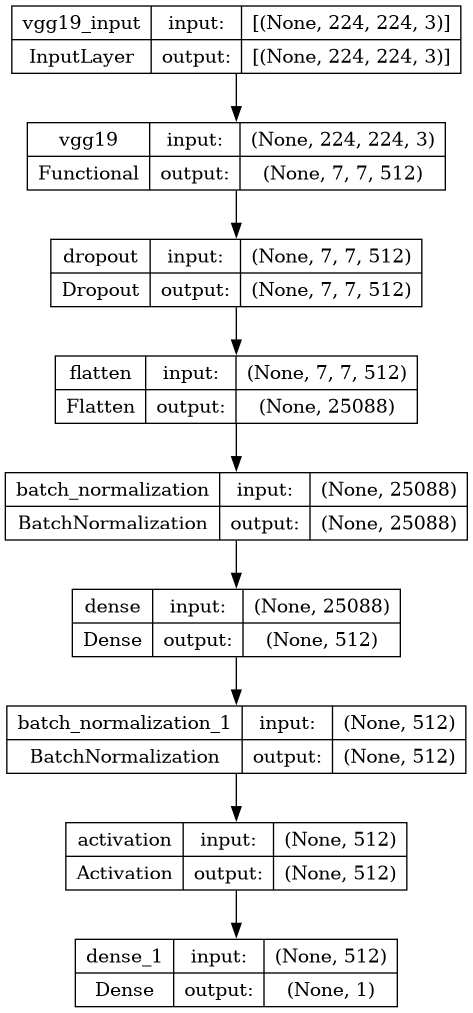

In [30]:
from tensorflow.keras.utils import plot_model
from IPython.display import SVG, Image
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
Image('model.png',width=400, height=200)

# Model Compile

In [31]:
# Model Compile

OPT    = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(loss='binary_crossentropy',
              metrics=['accuracy',Precision(),Recall()],
              optimizer=OPT)

# Defining Callbacks

# **EarlyStopping**

The EarlyStopping callback monitors the model's performance on the validation set, specifically the val_accuracy metric. If the validation accuracy does not improve for a specified number of epochs (patience = 5), the training process is stopped early to prevent overfitting. This helps to prevent the model from memorizing the training data too closely, potentially leading to poor performance on new, unseen data.

# **ModelCheckpoint**

The ModelCheckpoint callback periodically saves the model's weights to a file called ./best_weights.hdf5. The callback saves the weights whenever the validation accuracy improves (mode='max'). This ensures that the model with the highest validation accuracy is saved, which can be used for evaluation and deployment. The save_best_only parameter ensures that only the best model weights are saved, preventing unnecessary file bloat.

# **callback_list**

The callback_list variable stores the list of callbacks to be used during training. In this case, it includes the EarlyStopping and ModelCheckpoint callbacks. These callbacks help to prevent overfitting and save the model with the best validation accuracy, respectively.

In [49]:
# Defining Callbacks
from tensorflow.keras.callbacks import TensorBoard
import datetime
!pip install tensorboard
filepath = './best_weights.hdf5'

#log_dir = "logs/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#tensorboard_callback = TensorBoard(log_dir=log_dir)

#logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
#tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

tensorboard_callback = tf.keras.callbacks.TensorBoard("logs")

earlystopping = EarlyStopping(monitor = 'val_accuracy',
                              mode = 'max' ,
                              patience = 5,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath,
                                monitor = 'val_accuracy',
                                mode='max',
                                save_best_only=True,
                                verbose = 1)
callback_list = [earlystopping, checkpoint,tensorboard_callback]

In [50]:
model_history=model.fit(train_imgs,
                        validation_data=val_imgs,
                        epochs = 10,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/10
21/21 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9924 - precision: 0.9911 - recall: 0.9940
Epoch 1: val_accuracy improved from -inf to 1.00000, saving model to ./best_weights.hdf5
21/21 [==============================] - 15s 690ms/step - loss: 0.0229 - accuracy: 0.9924 - precision: 0.9911 - recall: 0.9940 - val_loss: 0.0014 - val_accuracy: 1.0000 - val_precision: 1.0000 - val_recall: 1.0000
Epoch 2/10
21/21 [==============================] - ETA: 0s - loss: 0.0266 - accuracy: 0.9893 - precision: 0.9910 - recall: 0.9881
Epoch 2: val_accuracy did not improve from 1.00000
21/21 [==============================] - 14s 664ms/step - loss: 0.0266 - accuracy: 0.9893 - precision: 0.9910 - recall: 0.9881 - val_loss: 0.0084 - val_accuracy: 0.9939 - val_precision: 1.0000 - val_recall: 0.9878
Epoch 3/10
21/21 [==============================] - ETA: 0s - loss: 0.0220 - accuracy: 0.9924 - precision: 0.9882 - recall: 0.9970
Epoch 3: val_accuracy did not improve f

In [52]:
#%load_ext tensorboard
%reload_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 591), started 0:07:28 ago. (Use '!kill 591' to kill it.)

In [53]:
import keras
model.save('./best_weights.hdf5')

# plot

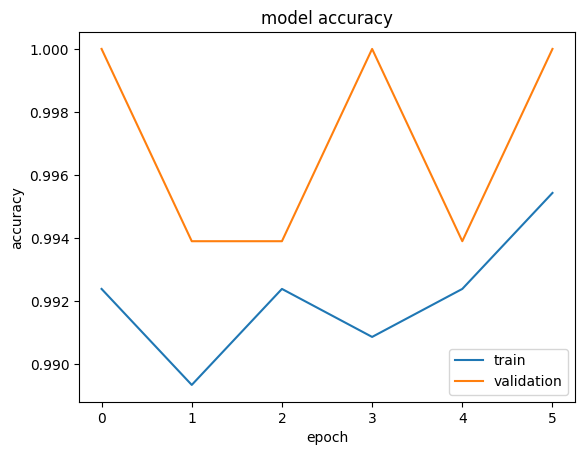

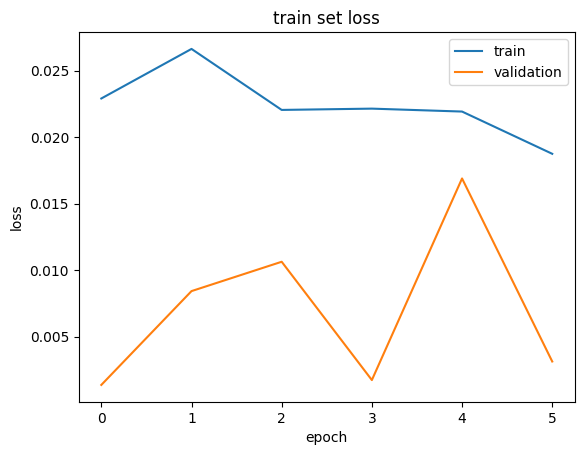

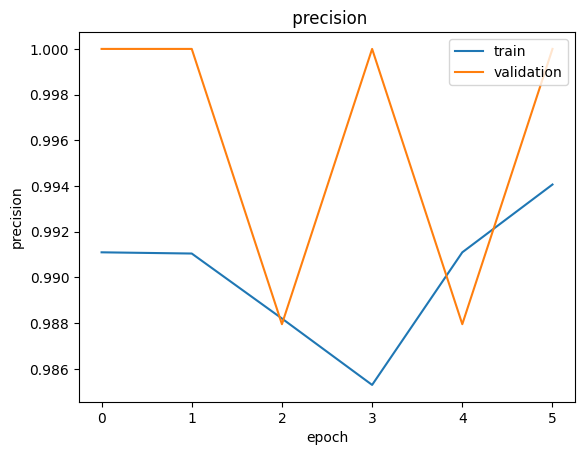

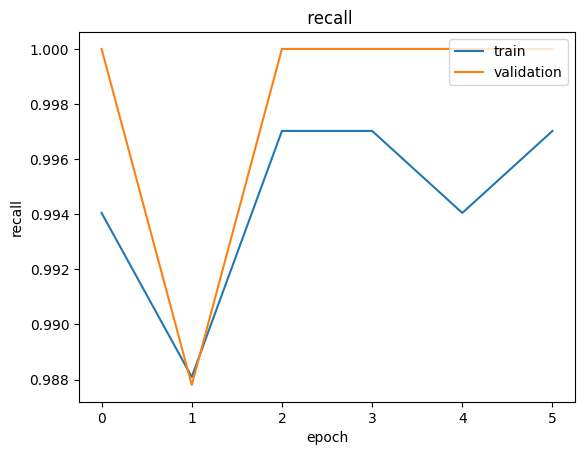

In [54]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('train set loss')

plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

plt.plot(model_history.history['precision'])
plt.plot(model_history.history['val_precision'])
plt.title(' precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


plt.plot(model_history.history['recall'])
plt.plot(model_history.history['val_recall'])
plt.title(' recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

# Validation

In [55]:
loss, accuracy , precision,recall=model.evaluate(val_imgs)
print('Test Accuracy: %.3f' % accuracy)
print('Test Precision: %.3f' % precision)
print('Test Recall: %.3f' % recall)
print('Test loss: %.3f' % loss)

6/6 [==============================] - 3s 430ms/step - loss: 0.0136 - accuracy: 0.9939 - precision: 0.9880 - recall: 1.0000
Test Accuracy: 0.994
Test Precision: 0.988
Test Recall: 1.000
Test loss: 0.014


# prediction

In [56]:
from tensorflow.keras.models import load_model

my_model = load_model("/kaggle/working/training/best_weights.hdf5")

In [57]:
y_pred = my_model.predict(test_imgs)


7/7 [==============================] - 4s 567ms/step


In [58]:
threshold = 0.5
pred_labels = ['human' if p > threshold else 'horse' for p in y_pred]

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Calculate evaluation metrics
accuracy = accuracy_score(test_df.label, pred_labels)


print("Accuracy:", accuracy)


Accuracy: 1.0


In [60]:
from sklearn.metrics import classification_report
print(classification_report(test_df.label, pred_labels))

              precision    recall  f1-score   support

       horse       1.00      1.00      1.00        97
       human       1.00      1.00      1.00       109

    accuracy                           1.00       206
   macro avg       1.00      1.00      1.00       206
weighted avg       1.00      1.00      1.00       206



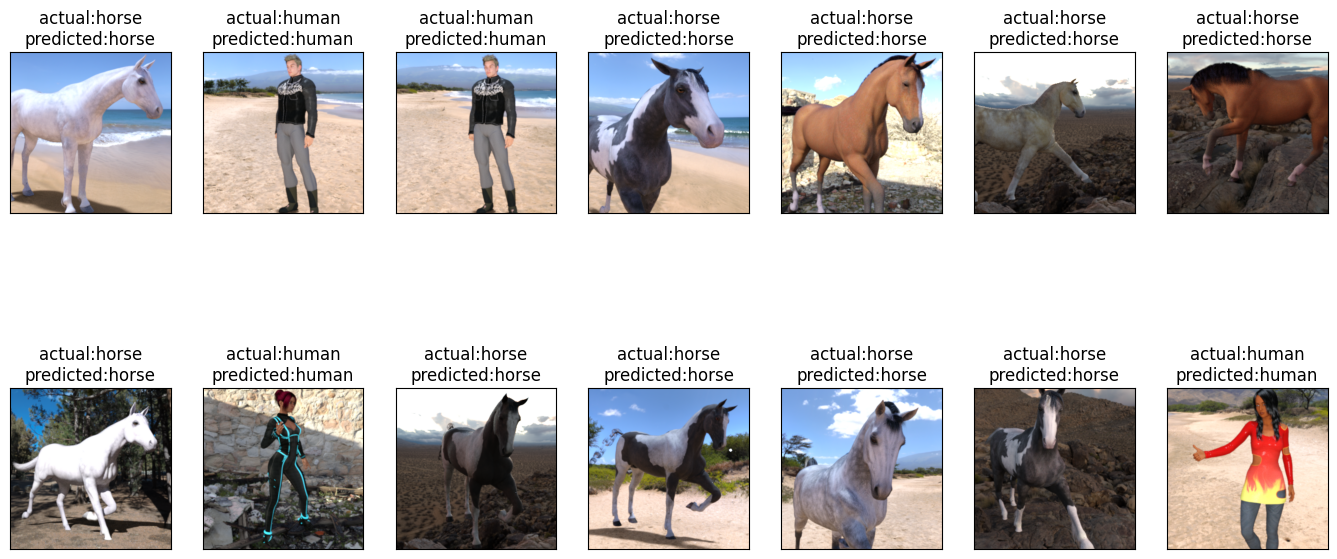

In [61]:
from PIL import Image


fig, axes = plt.subplots(ncols=7, nrows=2, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(2):
    for j in range(7):
        axes[i,j].set_title('actual:' + test_df.label[index] + '\n' + 'predicted:' + pred_labels[index])
        image = Image.open(test_df.path[index])
        image_array = np.array(image)  # Convert to a NumPy array
        axes[i,j].imshow(image, cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

In [62]:
pip install nbconvert

Note: you may need to restart the kernel to use updated packages.


In [63]:
nbconvert --to pdf your_notebook.ipynb

SyntaxError: invalid syntax (2626395911.py, line 1)